# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [8]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('pima-indians-diabetes.csv',header=None, sep=",")

## Exploración de datos

In [10]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,0,1,2,3,4,5,6,7,8
500,2,117,90,19,71,25.2,0.313,21,0
561,0,198,66,32,274,41.3,0.502,28,1
656,2,101,58,35,90,21.8,0.155,22,0
196,1,105,58,0,0,24.3,0.187,21,0
516,9,145,88,34,165,30.3,0.771,53,1
52,5,88,66,21,23,24.4,0.342,30,0
318,3,115,66,39,140,38.1,0.150,28,0
411,1,112,72,30,176,34.4,0.528,25,0
479,4,132,86,31,0,28.0,0.419,63,0
350,4,92,80,0,0,42.2,0.237,29,0


In [11]:
#Renombramos las columnas
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [12]:
#Verificacion de datos
df_diabetes.head(10)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [13]:
#Analizamos el shape del objeto
df_diabetes.shape

(768, 9)

In [14]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [16]:
df_diabetes.columns


Index(['1. Number of times pregnant',
       '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       '3. Diastolic blood pressure (mm Hg)',
       '4. Triceps skin fold thickness (mm)',
       '5. 2-Hour serum insulin (mu U/ml)',
       '6. Body mass index (weight in kg/(height in m)^2)',
       '7. Diabetes pedigree function', '8. Age (years)',
       '9. Class variable (0 or 1)'],
      dtype='object')

In [18]:
#Separamos en X e y
X=df_diabetes.drop('9. Class variable (0 or 1)',axis=1)
y= df_diabetes['9. Class variable (0 or 1)']

In [20]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split
#30% para test y 70% para train
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [24]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier
#Creacion del modelo
random_forest =RandomForestClassifier(n_estimators=10, random_state=42)

In [25]:
#Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [26]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [29]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test,y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.9888268156424581
El accuracy en test es:  0.7402597402597403


In [33]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature":list(X.columns),
     "importances":random_forest.feature_importances_}
).sort_values("importances",ascending=False)
# Mostrar
feature_importances_df


,feature,importances
1,2. Plasma glucose concentration a 2 hours in a...,0.262196
5,6. Body mass index (weight in kg/(height in m)^2),0.173489
7,8. Age (years),0.149754
6,7. Diabetes pedigree function,0.119033
2,3. Diastolic blood pressure (mm Hg),0.086000
0,1. Number of times pregnant,0.078183
4,5. 2-Hour serum insulin (mu U/ml),0.074285
3,4. Triceps skin fold thickness (mm),0.057060


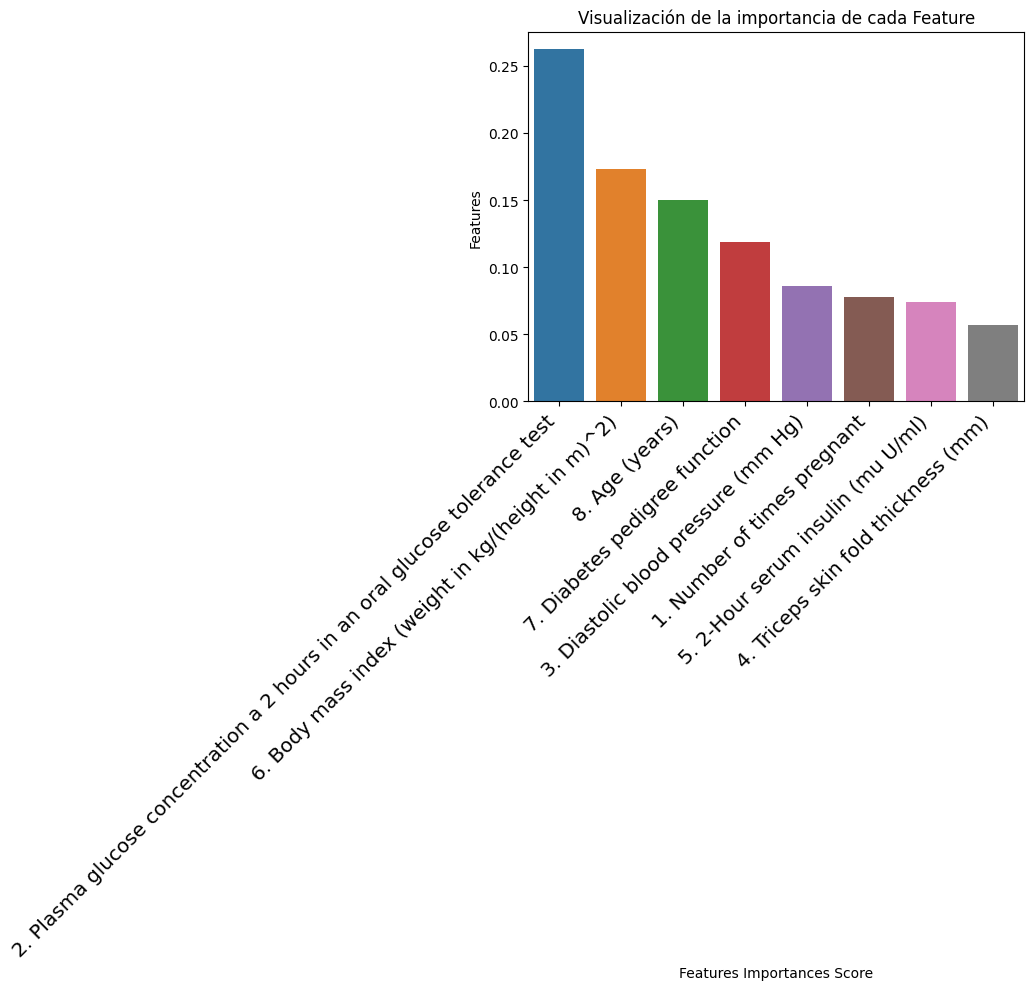

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_importances_df.feature , y=feature_importances_df.importances)
plt.xlabel('Features Importances Score')
plt.ylabel('Features')
plt.title("Visualización de la importancia de cada Feature")
plt.xticks(rotation=45, fontsize="x-large", horizontalalignment="right", fontweight='light')
plt.show()

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**